In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
def maxes(weights):
#     print(np.shape(weights))
    ret = np.array([])
    for idx in range(3,len(weights)-3):
        val = weights[idx]
#         print(idx)
        if (val > np.max(weights[idx+1:idx+3])) and (val > np.max(weights[idx-3:idx])):
            ret = np.append(ret, idx)
#             print(idx, val)
#             print("    ", np.max(weights[idx+1:idx+3]))
#             print(weights[idx:idx+3])
#             print()
    return ret

In [3]:
L = 9

H = hm.sparse_H(L)
vals, vecs = la.eigh(H)
eners = np.diag(vals)
vecsd = vecs.T.conj()

# Total time elapsed
end = 3
# Time steps per second
n = 20
N = n*end
A = hm.Z
for i in range(L-1):
    A = np.kron(A,hm.I)
B = hm.Z
for i in range(L-1):
    B = np.kron(hm.I,B)

weightfore9 = np.empty((L, N))
weightback9 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = vecs@np.diag(np.exp(-1j*vals*t))@vecsd
    At = np.linalg.inv(unitt) @ A @ unitt
    Bt = np.linalg.inv(unitt) @ B @ unitt
#     print(chop(unit3t),"\n")
    front = hm.norm(At)
    back  = hm.norm(Bt)
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore9[L-1-j, i] = front - fronthere
        weightback9[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

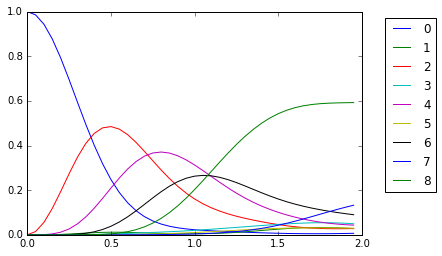

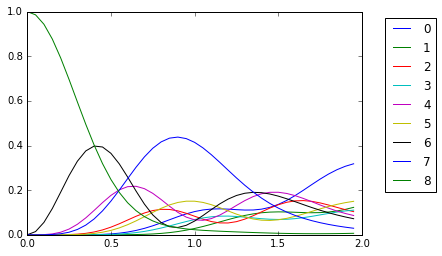

In [34]:
end = (int) (n*2)

for i in range(L):
    plt.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

for i in range(L):
    plt.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [37]:
for i in range(L):
    idx = maxes(weightfore9[i])
    print(idx/n)
print()
for i in range(L):
    idx = maxes(weightback9[L-i-1])
    print(idx/n)

[ 2.5]
[ 0.5   1.75]
[ 0.5  2.6]
[ 1.75]
[ 0.8]
[ 1.75]
[ 1.05  2.45]
[]
[]

[ 2.5]
[ 0.9]
[ 0.4   1.35]
[ 0.95  2.1 ]
[ 0.65  1.5   2.65]
[ 1.2   2.05]
[ 0.8   1.65  2.45]
[ 1.5   2.55]
[ 1.15]


In [6]:
weightfore9

array([[  1.00000000e+00,   9.85489150e-01,   9.43259370e-01,
          8.77025604e-01,   7.92374217e-01,   6.95982822e-01,
          5.94750354e-01,   4.94992706e-01,   4.01830309e-01,
          3.18840864e-01,   2.47988742e-01,   1.89788346e-01,
          1.43623370e-01,   1.08132294e-01,   8.15802675e-02,
          6.21617199e-02,   4.82073703e-02,   3.82957307e-02,
          3.12873474e-02,   2.63082012e-02,   2.27081287e-02,
          2.00139297e-02,   1.78885089e-02,   1.60998712e-02,
          1.44987375e-02,   1.30013966e-02,   1.15745894e-02,
          1.02207103e-02,   8.96332144e-03,   7.83415857e-03,
          6.86312476e-03,   6.07230452e-03,   5.47411159e-03,
          5.07272754e-03,   4.86733228e-03,   4.85544918e-03,
          5.03502515e-03,   5.40449656e-03,   5.96084254e-03,
          6.69628266e-03,   7.59468174e-03,   8.62880768e-03,
          9.75936519e-03,   1.09362862e-02,   1.21022211e-02,
          1.31976789e-02,   1.41669128e-02,   1.49635188e-02,
        